In [18]:
import pandas as pd

# Загрузите данные о продажах, инвентаре и заказах из CSV-файла (предполагается, что данные сохранены в файле)
data = pd.read_csv('sales_inventory_orders_data.csv')



In [2]:
num_rows, num_columns = data.shape
print(f'Количество строк: {num_rows}')

Количество строк: 3285


In [3]:
# Очистка данных (пример: удаление дубликатов)
data = data.drop_duplicates()

In [4]:
num_rows, num_columns = data.shape
print(f'Количество строк: {num_rows}')

Количество строк: 3285


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3284
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       3285 non-null   object
 1   Product    3285 non-null   object
 2   Sales      3285 non-null   int64 
 3   Orders     3285 non-null   int64 
 4   Inventory  3285 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 154.0+ KB


In [19]:

#  Трансформация данных (пример: изменение типов данных)
data['Date'] = pd.to_datetime(data['Date'])


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3285 non-null   datetime64[ns]
 1   Product    3285 non-null   object        
 2   Sales      3285 non-null   int64         
 3   Orders     3285 non-null   int64         
 4   Inventory  3285 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 128.4+ KB


In [8]:
# 4. Обработка пропущенных значений (пример: заполнение нулями)
data['Orders'].fillna(0, inplace=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [20]:
# Список уникальных продуктов
products = data['Product'].unique()

In [21]:
# Функция для визуализации данных для одного продукта
def plot_product_data(product_name):
    product_data = data[data['Product'] == product_name]
    
    # 1. Временные ряды продаж и инвентаря для одного продукта
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['Date'], product_data['Sales'], label='Продажи', color='b')
    plt.plot(product_data['Date'], product_data['Inventory'], label='Инвентарь', color='g')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.title(f'Временные ряды продаж и инвентаря для продукта "{product_name}"')
    plt.legend()
    plt.show()
    
    # 2. Диаграмма рассеяния (Scatter Plot) для одного продукта
    plt.figure(figsize=(8, 6))
    plt.scatter(product_data['Sales'], product_data['Inventory'])
    plt.xlabel('Продажи')
    plt.ylabel('Инвентарь')
    plt.title(f'Диаграмма рассеяния между продажами и инвентарем для продукта "{product_name}"')
    plt.show()

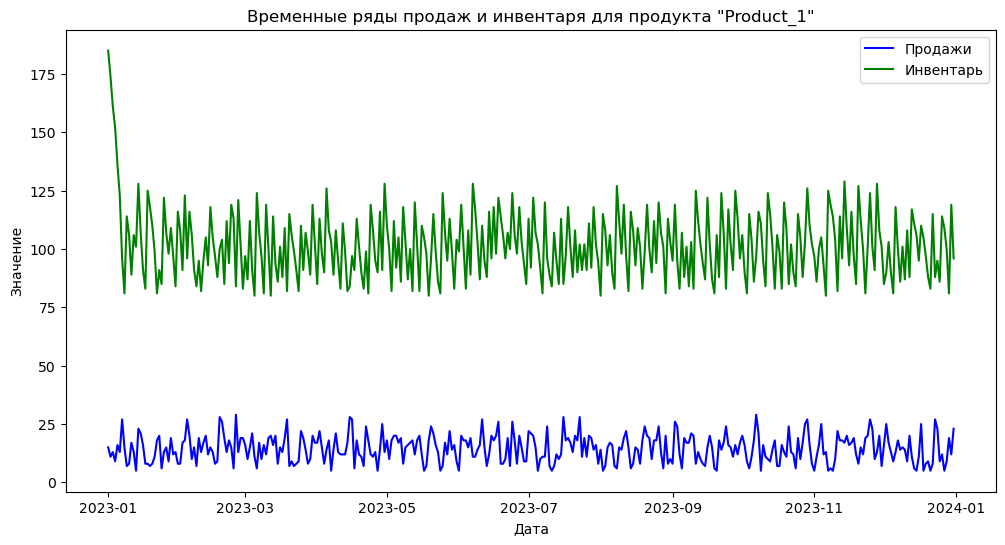

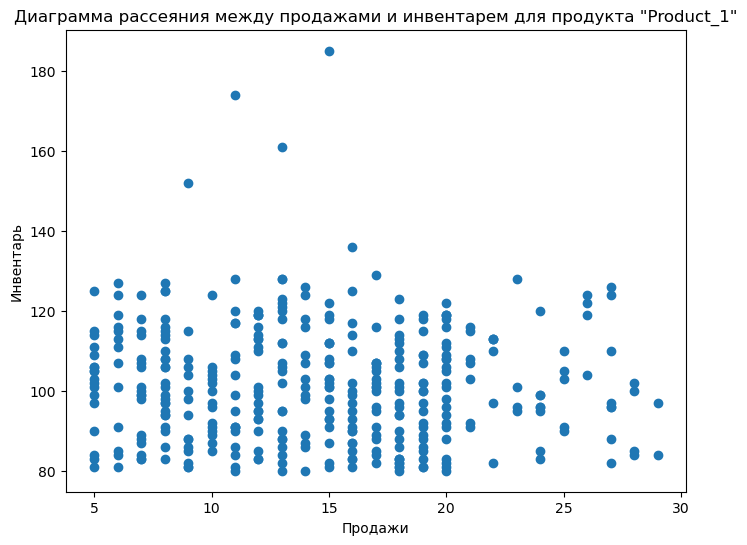

In [22]:
# Выберите продукт для визуализации
selected_product = 'Product_1'

# Вызов функции для визуализации данных для выбранного продукта
plot_product_data(selected_product)

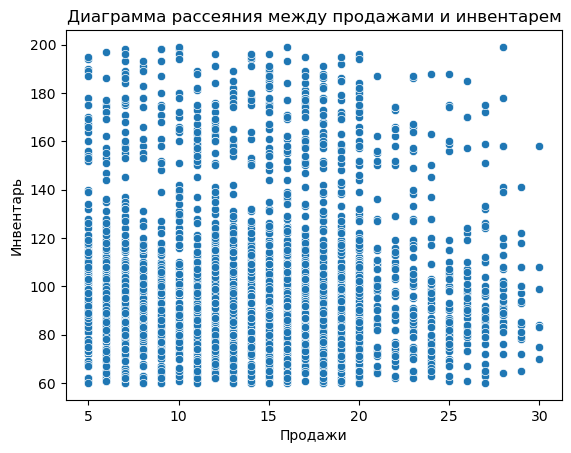

In [23]:
# 2. Диаграммы рассеяния (Scatter Plots)
sns.scatterplot(data=data, x='Sales', y='Inventory')
plt.xlabel('Продажи')
plt.ylabel('Инвентарь')
plt.title('Диаграмма рассеяния между продажами и инвентарем')
plt.show()

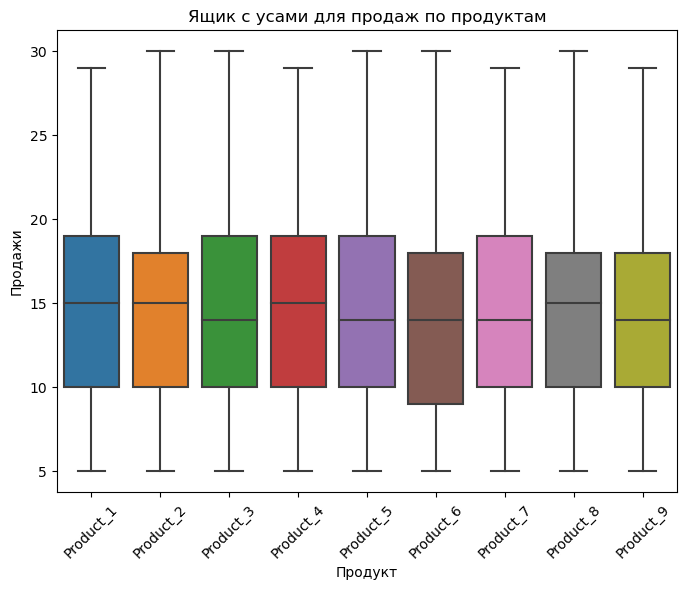

In [24]:
# 3. Гистограммы и ящики с усами (Box Plots)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Product', y='Sales')
plt.xlabel('Продукт')
plt.ylabel('Продажи')
plt.title('Ящик с усами для продаж по продуктам')
plt.xticks(rotation=45)
plt.show()

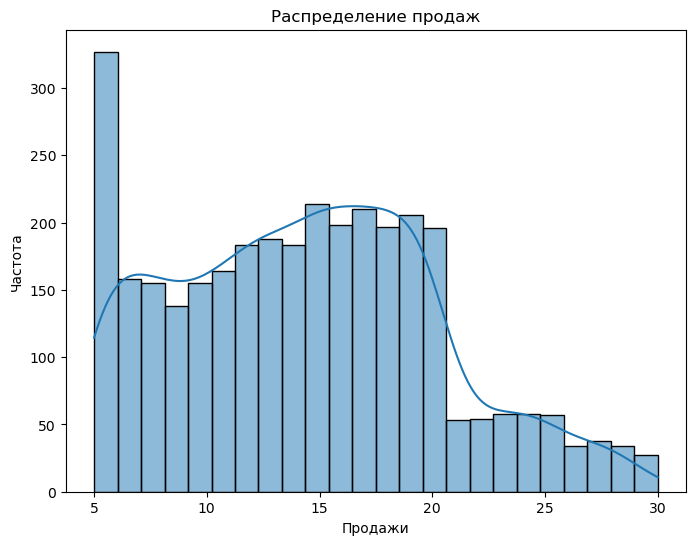

In [25]:
# 4. Анализ распределения данных (пример: гистограмма)
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], kde=True)
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.title('Распределение продаж')
plt.show()

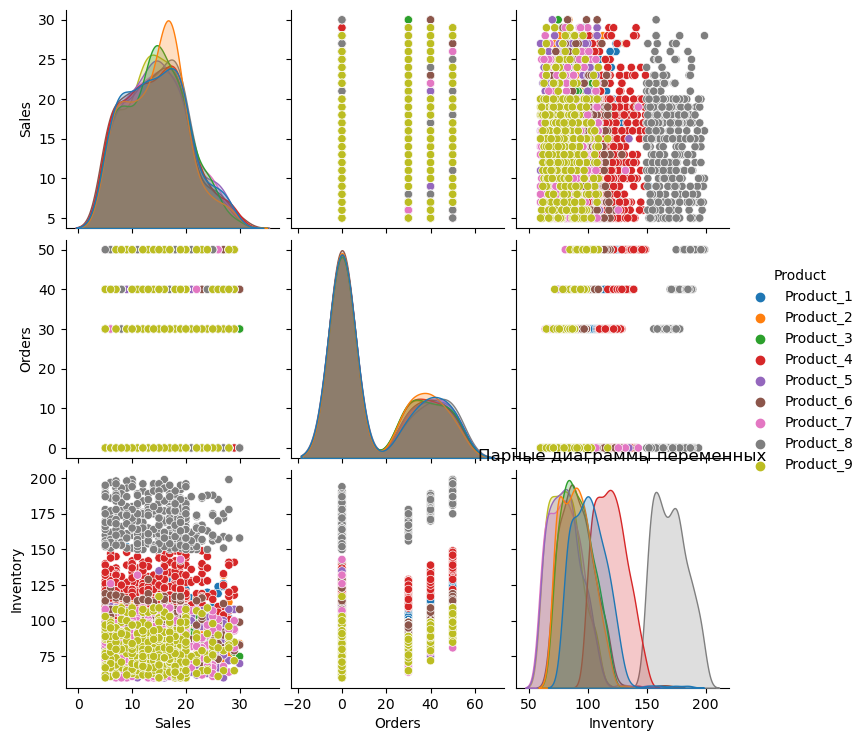

In [26]:
# 6. Оценка структуры данных (пример: парные диаграммы)
sns.pairplot(data, hue='Product')
plt.title('Парные диаграммы переменных')
plt.show()

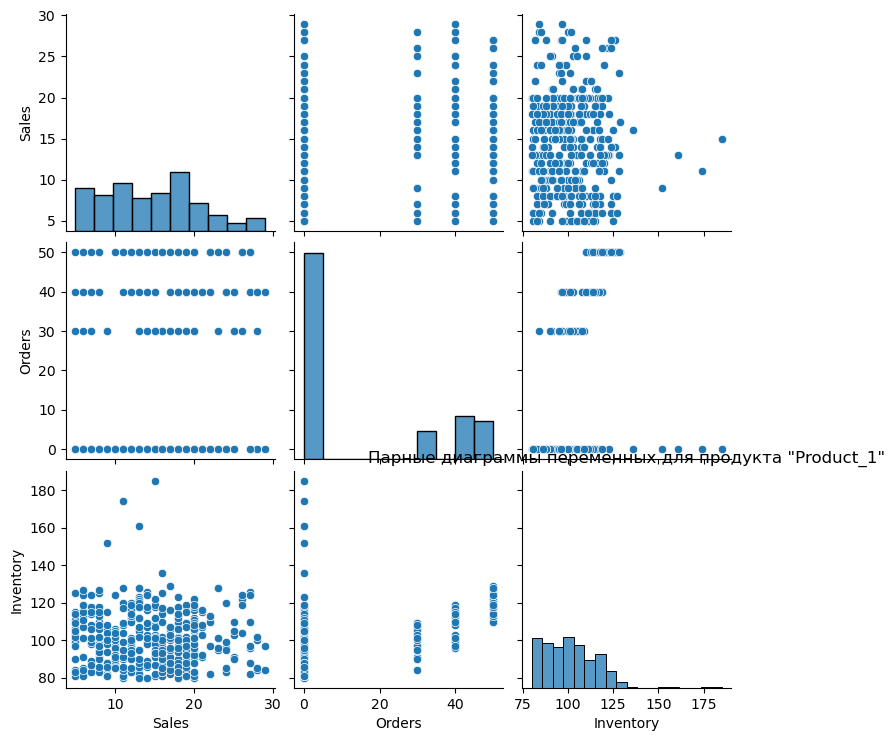

In [27]:
# Выберите продукт для анализа
selected_product = 'Product_1'

# Фильтрация данных только для выбранного продукта
product_data = data[data['Product'] == selected_product]

# Создание парных диаграмм для выбранного продукта
sns.pairplot(product_data)
plt.title(f'Парные диаграммы переменных для продукта "{selected_product}"')
plt.show()